In [79]:
%matplotlib widget

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.optimize import curve_fit
import seaborn as sns

In [81]:
df = pd.DataFrame(np.genfromtxt("data/bitcoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))
ethereum_df = pd.DataFrame(np.genfromtxt("data/ethereum_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [82]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11
360,"""2024-09-18T00:00:00.000Z""","""2024-09-18T23:59:59.999Z""","""2024-09-18T23:58:00.000Z""","""2024-09-18T16:06:00.000Z""","""2781""",60309.0018795135,61664.0673338615,59218.2524421004,61649.6787266514,40990702890.6,1217976155884.66,"""2024-09-18T23:59:59.999Z"""
361,"""2024-09-17T00:00:00.000Z""","""2024-09-17T23:59:59.999Z""","""2024-09-17T15:22:00.000Z""","""2024-09-17T01:01:00.000Z""","""2781""",58192.5093438557,61316.0913839546,57628.0717661941,60308.5375947655,38075570117.66,1191434667557.74,"""2024-09-17T23:59:59.999Z"""
362,"""2024-09-16T00:00:00.000Z""","""2024-09-16T23:59:59.999Z""","""2024-09-16T00:05:00.000Z""","""2024-09-16T17:13:00.000Z""","""2781""",59185.22685956,59205.5103578251,57501.3391727673,58192.5068714421,32032822113.39,1149595000633.19,"""2024-09-16T23:59:59.999Z"""
363,"""2024-09-15T00:00:00.000Z""","""2024-09-15T23:59:59.999Z""","""2024-09-15T15:46:00.000Z""","""2024-09-15T23:12:00.000Z""","""2781""",60000.7283175086,60381.9166672998,58696.3094180022,59182.8353338828,18120960866.97,1169182849928.94,"""2024-09-15T23:59:59.999Z"""
364,"""2024-09-14T00:00:00.000Z""","""2024-09-14T23:59:59.999Z""","""2024-09-14T00:19:00.000Z""","""2024-09-14T18:10:00.000Z""","""2781""",60569.1162343064,60656.7211280316,59517.8819333016,60005.1191557571,16428405496.29,1185265247315.9,"""2024-09-14T23:59:59.999Z"""


In [83]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]
new_headers_ethereum = ethereum_df.iloc[0]
ethereum_df.columns = new_headers
ethereum_df = ethereum_df[1:]

In [84]:
df.head(5)

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""
5,"""2025-09-08T00:00:00.000Z""","""2025-09-08T23:59:59.999Z""","""2025-09-08T15:26:00.000Z""","""2025-09-08T02:22:00.000Z""","""2781""",111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78,2232377995774.42,"""2025-09-08T23:59:59.999Z"""


In [85]:
df.columns.to_list()

['\ufefftimeOpen',
 'timeClose',
 'timeHigh',
 'timeLow',
 'name',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'timestamp']

In [86]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)
ethereum_df.drop(['\ufefftimeOpen', 'timeClose', 'timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow', 'close'], axis=1, inplace=True)

In [87]:
ethereum_df.rename(columns={'open': 'eth_open', 'high': 'eth_high', 'low': 'eth_low', 'volume': 'eth_volume'}, inplace=True)

In [88]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')


In [89]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [90]:
df

,timeClose,open,high,low,close,volume
1,363 days,115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45
2,362 days,113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3
3,361 days,111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11
4,360 days,112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09
5,359 days,111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78
...,...,...,...,...,...,...
360,4 days,60309.0018795135,61664.0673338615,59218.2524421004,61649.6787266514,40990702890.6
361,3 days,58192.5093438557,61316.0913839546,57628.0717661941,60308.5375947655,38075570117.66
362,2 days,59185.22685956,59205.5103578251,57501.3391727673,58192.5068714421,32032822113.39
363,1 days,60000.7283175086,60381.9166672998,58696.3094180022,59182.8353338828,18120960866.97


In [91]:
int(df['timeClose'].iloc[0].days)

363

In [92]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))
ethereum_df["eth_open"] = (ethereum_df["eth_open"].astype(float))
ethereum_df["eth_high"] = (ethereum_df["eth_high"].astype(float))
ethereum_df["eth_low"] = (ethereum_df["eth_low"].astype(float))
ethereum_df["eth_volume"] = (ethereum_df["eth_volume"].astype(float))
ethereum_df = pd.concat([ethereum_df, df["close"]], axis=1)

In [93]:
df

,timeClose,open,high,low,close,volume
1,363,115507.792956,116769.382525,114794.484351,116101.580896,5.478573e+10
2,362,113961.428094,115522.543870,113453.839309,115507.537527,4.568507e+10
3,361,111531.247880,114275.252781,110940.076863,113955.358955,5.637747e+10
4,360,112077.577274,113225.440041,110776.700308,111530.549982,4.598448e+10
5,359,111163.017798,112869.235698,110630.605598,112071.431089,4.021281e+10
...,...,...,...,...,...,...
360,4,60309.001880,61664.067334,59218.252442,61649.678727,4.099070e+10
361,3,58192.509344,61316.091384,57628.071766,60308.537595,3.807557e+10
362,2,59185.226860,59205.510358,57501.339173,58192.506871,3.203282e+10
363,1,60000.728318,60381.916667,58696.309418,59182.835334,1.812096e+10


In [94]:
ethereum_df

,eth_open,eth_high,eth_low,eth_volume,close
1,4589.505690,4620.792821,4443.264748,3.035262e+10,116101.580896
2,4592.442761,4643.972430,4556.270131,3.349726e+10,115507.537527
3,4503.635681,4617.234691,4429.644497,4.412090e+10,113955.358955
4,4526.078199,4537.599678,4428.330126,3.276150e+10,111530.549982
5,4609.723012,4670.530051,4469.861437,4.022406e+10,112071.431089
...,...,...,...,...,...
360,2654.361584,2672.461794,2557.724345,1.411973e+10,61649.678727
361,2648.482226,2671.275856,2593.152174,1.665881e+10,60308.537595
362,2582.774825,2701.677791,2541.910293,1.991284e+10,58192.506871
363,2615.848101,2632.039336,2528.522196,1.318066e+10,59182.835334


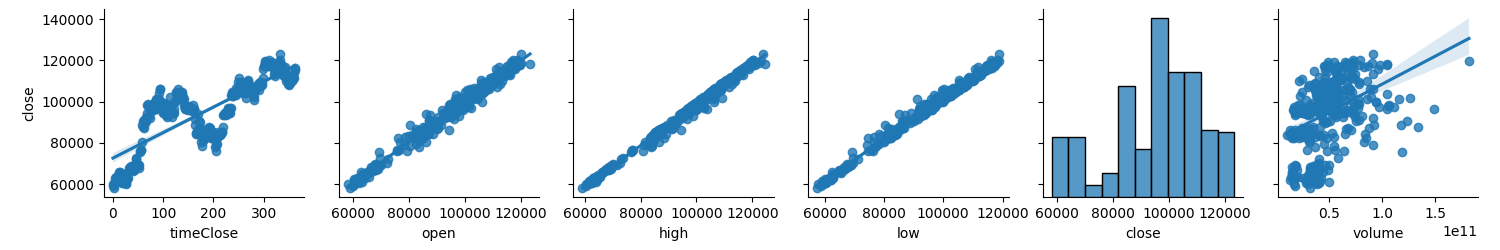

In [99]:
sns.pairplot(df, y_vars=['close'], kind='reg')

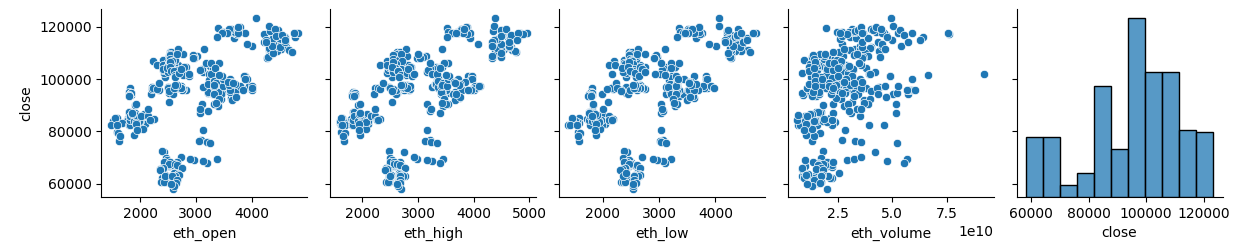

In [ ]:
sns.pairplot(ethereum_df, kind='reg', y_vars=['close'])

In [44]:
X_multi_stuff = pd.concat([df[['open', 'high', 'low']]], axis=1)
y = df['close'].values.reshape(-1, 1)
test_model = LinearRegression()
test_model.fit(X_multi_stuff, y)
y_predicted_test = test_model.predict(X_multi_stuff)
print(r2_score(y, y_predicted_test))

0.9968627927689967


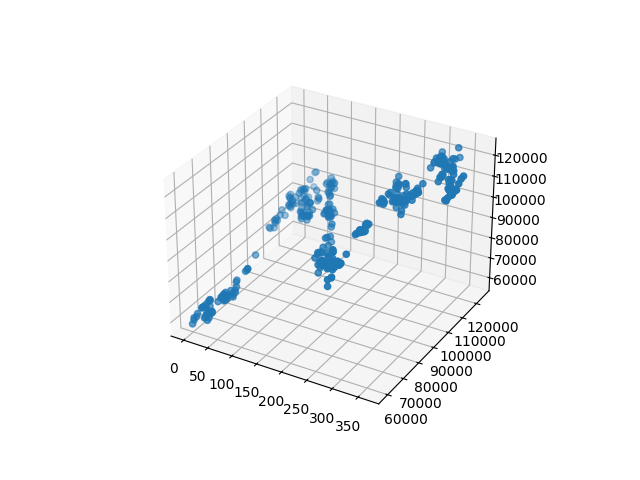

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df['timeClose']
ys = df['high']
zs = df['close']
ax.scatter(xs, ys, zs)
plt.show()

In [53]:
X_sing = df['timeClose'].values.reshape(-1, 1)
X_multi = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume']], ethereum_df[['eth_open', 'eth_high', 'eth_low', 'eth_volume']]], axis=1)
y = df['close'].values.reshape(-1, 1)
X_multi_test = pd.concat([df[['timeClose', 'open']]], axis=1)


In [103]:
X_multi_s = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume']], ethereum_df[['eth_open', 'eth_high', 'eth_low', 'eth_volume']], df['close']], axis=1)

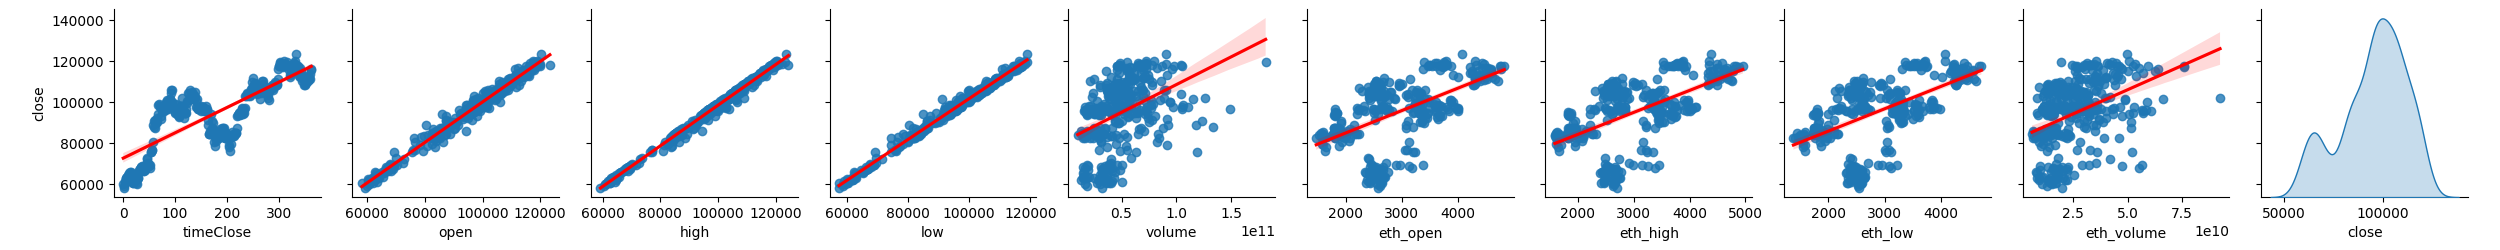

In [108]:
sns.pairplot(X_multi_s, kind='reg', diag_kind='kde',
             plot_kws={'line_kws': {'color': 'red'}}, y_vars=['close'])

In [47]:
X_train_sing, X_test_sing, y_train_sing, y_test_sing = train_test_split(X_sing, y, test_size=0.2)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2)

In [58]:
model_multi_test = LinearRegression()
model_multi_test.fit(X_multi_test, y)
y_predicted_test = model_multi_test.predict(X_multi_test)
r2_linear = r2_score(y, y_predicted_test)
print(r2_linear)
print("Cross validation for polynomial regression: " + str(cross_val_score(model_multi_test, X_test_sing, y_test_sing, cv=10).mean()))
print("MSE for polynomial regression: " + str(mean_squared_error(y_predicted_test, y)))
print(f"MAPE for polynomial regression: {str(round(mean_absolute_percentage_error(y_predicted_test, y) * 100, 5))}% \n")

0.9832364969206773
Cross validation for polynomial regression: 0.4474794503520093
MSE for polynomial regression: 4390833.804499368
MAPE for polynomial regression: 1.63607% 



In [48]:
degree = 7
polyreg_sing = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
polyreg_sing.fit(X_train_sing, y_train_sing)

line_of_best_fit = LinearRegression()
line_of_best_fit.fit(X_sing, y)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

ridge_sing = Ridge(alpha=1)
ridge_sing.fit(X_train_sing, y_train_sing)

ridge_multi = Ridge(alpha=1)
ridge_multi.fit(X_train_multi, y_train_multi)

ridge_multi_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000]))
])
ridge_multi_cv.fit(X_train_multi, y_train_multi)

lasso_multi = Lasso(alpha=1)
lasso_multi.fit(X_train_multi, y_train_multi)

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.22317e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+08, tolerance: 7.648e+06
  model = cd_fast.enet_coordinate_descent(


,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [49]:
y_predicted_linear = line_of_best_fit.predict(X_test_sing)
r2_linear = r2_score(y_test_sing, y_predicted_linear)

y_predicted_sing = polyreg_sing.predict(X_test_sing)
r2_sing = r2_score(y_test_sing, y_predicted_sing)

y_predicted_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_predicted_multi)

y_predicted_ridge_sing = ridge_sing.predict(X_test_sing)
r2_ridge_sing = r2_score(y_test_sing, y_predicted_ridge_sing)

y_predicted_ridge_multi = ridge_multi.predict(X_test_multi)
r2_ridge_multi = r2_score(y_test_multi, y_predicted_ridge_multi)

y_predicted_ridge_multi_cv = ridge_multi_cv.predict(X_test_multi)
r2_ridge_multi_cv = r2_score(y_test_multi, y_predicted_ridge_multi_cv)

y_predicted_lasso_multi = lasso_multi.predict(X_test_multi)
r2_lasso_multi = r2_score(y_test_multi, y_predicted_lasso_multi)

print(f"r2 score of single variable linear regression: {r2_linear}")
print(f"r2 score of single variable polynomial regression: {r2_sing}")
print(f"r2 score of multi variable linear regression: {r2_multi}")
print(f"r2 score of single variable ridge regression: {r2_ridge_sing}")
print(f"r2 score of multi variable ridge regression: {r2_ridge_multi}")
print(f"r2 score of multi variable ridge cv regression: {r2_ridge_multi_cv}")
print(f"r2 score of multi variable ridge regression: {r2_lasso_multi}")

r2 score of single variable linear regression: 0.6383885369560265
r2 score of single variable polynomial regression: 0.8843596738701682
r2 score of multi variable linear regression: 0.9960412208080741
r2 score of single variable ridge regression: 0.6376967976349426
r2 score of multi variable ridge regression: 0.9960412211028304
r2 score of multi variable ridge cv regression: 0.9960456437678725
r2 score of multi variable ridge regression: 0.9959853162842558


In [50]:
print("Cross validation for polynomial regression: " + str(cross_val_score(polyreg_sing, X_test_sing, y_test_sing, cv=10).mean()))
print("MSE for polynomial regression: " + str(mean_squared_error(y_test_sing, y_predicted_sing)))
print(f"MAPE for polynomial regression: {str(round(mean_absolute_percentage_error(y_test_sing, y_predicted_sing) * 100, 5))}% \n")

print(f"Cross validation for multivariable regression: {str(cross_val_score(model_multi, X_test_multi, y_test_multi, cv=10).mean())}")
print(f"MSE for multivariable regression: {str(mean_squared_error(y_test_multi, y_predicted_multi))}")
print(f"MAPE for multivariable regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_multi) * 100, 5))}% \n")

print("Cross validation for single variable ridge regression: " + str(cross_val_score(ridge_sing, X_test_sing, y_test_sing, cv=10).mean()))
print("MSE for single variable ridge regression: " + str(mean_squared_error(y_test_sing, y_predicted_ridge_sing)))
print(f"MAPE for single variable ridge regression: {str(round(mean_absolute_percentage_error(y_test_sing, y_predicted_ridge_sing) * 100, 5))}% \n")

print("Cross validation for multi variable ridge regression: " + str(cross_val_score(ridge_multi, X_test_multi, y_test_multi, cv=10).mean()))
print("MSE for multi variable ridge regression: " + str(mean_squared_error(y_test_multi, y_predicted_ridge_multi)))
print(f"MAPE for multi variable ridge regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_ridge_multi) * 100, 5))}% \n")

print("Cross validation for multi variable ridge cv regression: " + str(cross_val_score(ridge_multi_cv, X_test_multi, y_test_multi, cv=10).mean()))
print("MSE for multi variable ridge cv regression: " + str(mean_squared_error(y_test_multi, y_predicted_ridge_multi_cv)))
print(f"MAPE for multi variable ridge cv regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_ridge_multi_cv) * 100, 5))}% \n")

print("Cross validation for multi variable ridge regression: " + str(cross_val_score(lasso_multi, X_test_multi, y_test_multi, cv=10).mean()))
print("MSE for multi variable ridge regression: " + str(mean_squared_error(y_test_multi, y_predicted_lasso_multi)))
print(f"MAPE for multi variable ridge regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_lasso_multi) * 100, 5))}% \n")

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.88938e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.98711e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.83022e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.51593e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/scipy/_lib/

Cross validation for polynomial regression: 0.8459561325238918
MSE for polynomial regression: 27390608.36940292
MAPE for polynomial regression: 4.43942% 

Cross validation for multivariable regression: 0.9909384399638512
MSE for multivariable regression: 1007038.3842902674
MAPE for multivariable regression: 0.72956% 

Cross validation for single variable ridge regression: 0.44747957903050384
MSE for single variable ridge regression: 85815264.09585074
MAPE for single variable ridge regression: 8.76862% 

Cross validation for multi variable ridge regression: 0.990938486547267
MSE for multi variable ridge regression: 1007038.3093098237
MAPE for multi variable ridge regression: 0.72956% 

Cross validation for multi variable ridge cv regression: 0.9905846143518005
MSE for multi variable ridge cv regression: 1005913.267158627
MAPE for multi variable ridge cv regression: 0.73102% 

Cross validation for multi variable ridge regression: 0.9911194226324678
MSE for multi variable ridge regression

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 1.671e+06
  model = cd_fast.enet_coordinate_descent(


In [51]:
y_predicted = polyreg_sing.predict(X_sing)
y_pred = line_of_best_fit.predict(X_sing)

In [52]:
plt.scatter(X_sing, y)
plt.plot(X_sing, y_predicted, color='red', label='Line of Best Fit')
plt.plot(X_sing, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.xlabel("Time from 2025-09-18 (days)")
plt.ylabel("Price (USD)")
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

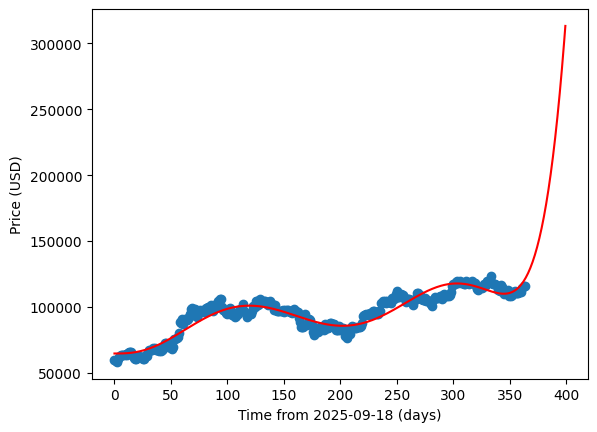

In [ ]:
plt.scatter(X_sing, y)
arr = np.arange(400).reshape(-1, 1)
y_predicted_graph = polyreg_sing.predict(arr)
plt.plot(arr, y_predicted_graph, color='red', label='Line of Best Fit')
plt.xlabel("Time from 2025-09-18 (days)")
plt.ylabel("Price (USD)")
plt.show()

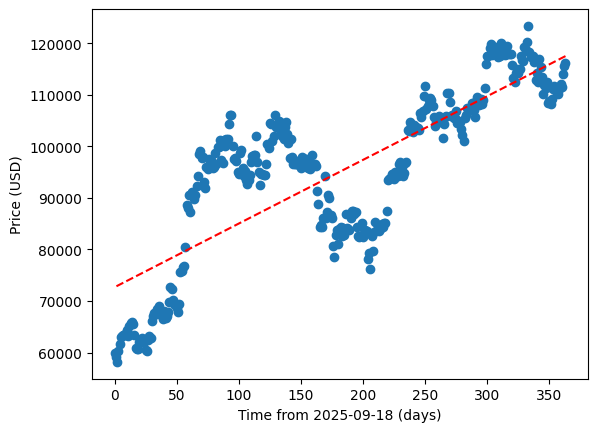

In [ ]:
plt.scatter(X_sing, y)
plt.plot(X_sing, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.xlabel("Time from 2025-09-18 (days)")
plt.ylabel("Price (USD)")
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_multi_scaled = scaler.fit_transform(X_train_multi)

model_multi_standardised = LinearRegression()
model_multi_standardised.fit(X_train_multi_scaled, y_train_multi)

print("Feature coefficients (standardized features):")
for feature, coef in zip(X_train_multi.columns, model_multi_standardised.coef_.flatten()):
    print(f"{feature}: {abs(coef):.4f}")

Feature coefficients (standardized features):
timeClose: 160.5903
open: 9068.2338
high: 13650.7950
low: 11676.6067
volume: 25.3672
eth_open: 649.2849
eth_high: 277.4600
eth_low: 381.9778
eth_volume: 40.1648


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi_scaled, y_train_multi)

print("Ridge coefficients (more stable):")
for feature, coef in zip(X_train_multi.columns, ridge_model.coef_.flatten()):
    print(f"{feature}: {coef:.4f}")

y_pred_ridge = ridge_model.predict(X_train_multi_scaled)
print(f"R² score (ridge): {r2_score(y_train_multi, y_pred_ridge):.4f}")

Ridge coefficients (more stable):
timeClose: 228.5129
open: -2233.6983
high: 9528.9454
low: 8814.2603
volume: 149.2947
eth_open: 295.6911
eth_high: -241.1400
eth_low: -40.9841
eth_volume: 64.5798
R² score (ridge): 0.9958


In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0], cv=5)
ridge_cv_model.fit(X_train_multi_scaled, y_train_multi)

print("RidgeCV coefficients:")
for feature, coef in zip(X_train_multi.columns, ridge_cv_model.coef_.flatten()):
    print(f"{feature}: {coef:.4f}")

y_pred_ridge_cv = ridge_cv_model.predict(X_train_multi_scaled)
print(f"R² score (RidgeCV): {r2_score(y_train_multi, y_pred_ridge_cv):.4f}")
print(f"Selected alpha: {ridge_cv_model.alpha_:.4f}")

# Feature importance ranking
ridge_cv_importance = pd.DataFrame({
    'feature': X_train_multi.columns,
    'coefficient': ridge_cv_model.coef_.flatten(),
    'abs_importance': abs(ridge_cv_model.coef_.flatten())
}).sort_values('abs_importance', ascending=False)

print("\nRidgeCV Feature Importance Ranking:")
print(ridge_cv_importance.round(4))

RidgeCV coefficients:
timeClose: 167.2343
open: -7871.3021
high: 12908.8854
low: 11202.4007
volume: 48.1183
eth_open: 578.1354
eth_high: -302.3920
eth_low: -286.6534
eth_volume: 47.8177
R² score (RidgeCV): 0.9968
Selected alpha: 0.1000

RidgeCV Feature Importance Ranking:
      feature  coefficient  abs_importance
2        high   12908.8854      12908.8854
3         low   11202.4007      11202.4007
1        open   -7871.3021       7871.3021
5    eth_open     578.1354        578.1354
6    eth_high    -302.3920        302.3920
7     eth_low    -286.6534        286.6534
0   timeClose     167.2343        167.2343
4      volume      48.1183         48.1183
8  eth_volume      47.8177         47.8177


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi_scaled, y_train_multi)

print("Ridge coefficients (more stable):")
for feature, coef in zip(X_train_multi.columns, ridge_model.coef_.flatten()):
    print(f"{feature}: {coef:.4f}")

y_pred_ridge = ridge_model.predict(X_train_multi_scaled)
print(f"R² score (ridge): {r2_score(y_train_multi, y_pred_ridge):.4f}")

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_multi_scaled, y_train_multi)

print("Lasso coefficients:")
for feature, coef in zip(X_train_multi.columns, lasso_model.coef_.flatten()):
    print(f"{feature}: {coef:.4f}")

y_pred_lasso = lasso_model.predict(X_train_multi_scaled)
print(f"R² score (Lasso): {r2_score(y_train_multi, y_pred_lasso):.4f}")

non_zero_coefs = np.sum(lasso_model.coef_ != 0)
print(f"Features selected (non-zero coefficients): {non_zero_coefs}/{len(lasso_model.coef_)}")

Lasso coefficients:
timeClose: 153.8778
open: -8904.6312
high: 13699.9637
low: 11472.1271
volume: 13.0718
eth_open: 363.7142
eth_high: -216.4296
eth_low: -157.5915
eth_volume: 48.8918
R² score (Lasso): 0.9968
Features selected (non-zero coefficients): 9/9


In [ ]:
model_3D = LinearRegression()
X_3D = pd.concat([df[['timeClose', 'open']]], axis=1)
y = df['close'].values.reshape(-1, 1)
model_3D.fit(X_3D, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred_3d = model_3D.predict(X_3D)

In [ ]:
date = np.linspace(0, 365)
open = np.linspace(0, 140000)
X1, X2 = np.meshgrid(date, open)
grid_points = np.c_[X1.ravel(), X2.ravel()]
full_y_pred_3d = model_3D.predict(grid_points).reshape(X1.shape)

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/var/folders/cd/1qdj9rln31b4qg7ltkhk9s080000gq/T/ipykernel_61074/3345958198.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


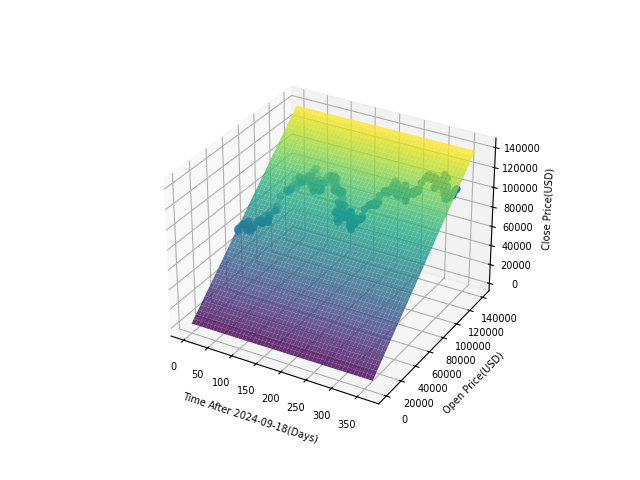

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df['timeClose']
ys = df['open']
zs = df['close']
ax.set_xlabel('Time After 2024-09-18(Days)', size=7)
ax.set_ylabel('Open Price(USD)', size=7)
ax.set_zlabel('Close Price(USD)', size=7)
ax.tick_params(axis='both', which='major', labelsize=7) 
ax.plot_surface(X1, X2, full_y_pred_3d, cmap='viridis', alpha = 0.8)
ax.scatter(xs, ys, zs)
plt.show()